## 実験概要
DC-SGDにおけるノイズの強度について変化させながら分割数ごとの過剰期待損失、そのステップごとの推移を確認する。

ノイズの種類
- 正規分布
    - 平均0
    - 分散
        - 1.5
        - 2.2
        - 2.4
- 対数正規分布
    - 平均0
    - 分散
        - 1.25
        - 1.75
        - 1.90

トライアルの回数は1000,ただし損失の推移についてはそのうちの一回を使用

## 結果

ノイズが正規分布の場合、分割を多くする方が最終的な期待損失は若干小さくなる。
ノイズが対数正規分布の場合

In [1]:
 import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from ML2_lib import DC_SGD
from ML2_lib import loss
from ML2_lib import plot_set

In [2]:
X_mean = 5
X_var = 2

w_star = np.array([1,2,3,4,5,6])
w_star = w_star.reshape(1,-1)
d = w_star.shape[1]
n = 10000
c = 5
noise = "normal"
rng = np.random.default_rng()
w_init = w_star + rng.uniform(-c,c,size=d)
son = loss.LinearQuadraticLoss()
columns=['1', '2', '4','5','10','20']
k_list = [0,1,3,4,9,19]




  0%|          | 0/1000 [00:00<?, ?it/s]

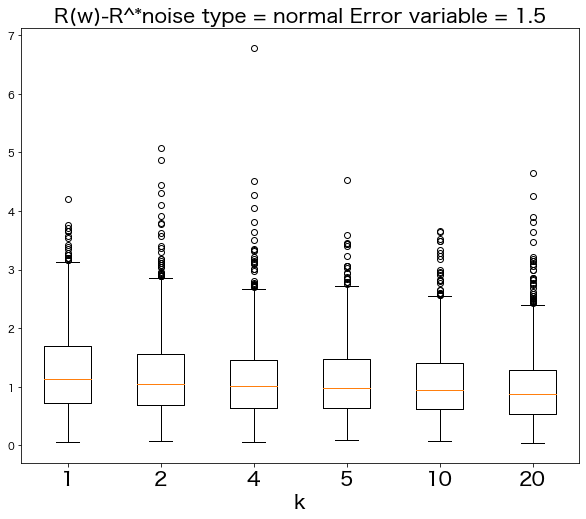

In [3]:
E_var = 1.5
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [4]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.274703,1.195804,1.128489,1.098351,1.066756,0.988345
std,0.716552,0.712524,0.679749,0.629220,0.612045,0.622518
min,0.054701,0.077548,0.050215,0.091394,0.077014,0.040062
25%,0.730157,0.693105,0.640892,0.641963,0.626457,0.534450
50%,1.129630,1.048550,1.011074,0.973487,0.950827,0.872839
75%,1.690621,1.557620,1.461938,1.473197,1.398974,1.286211
max,4.212047,5.071664,6.785452,4.531358,3.663909,4.642356


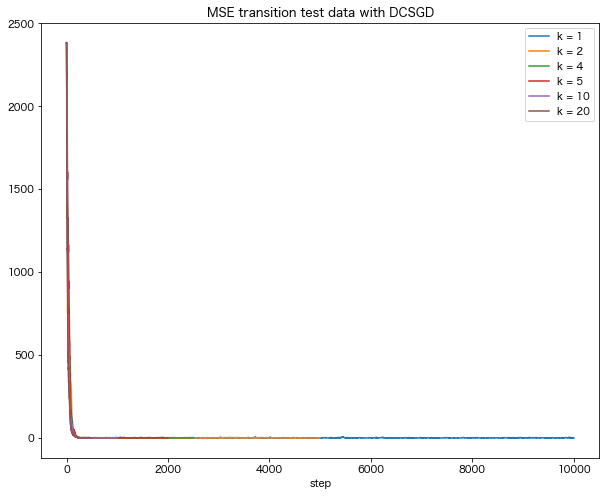

In [5]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/1000 [00:00<?, ?it/s]

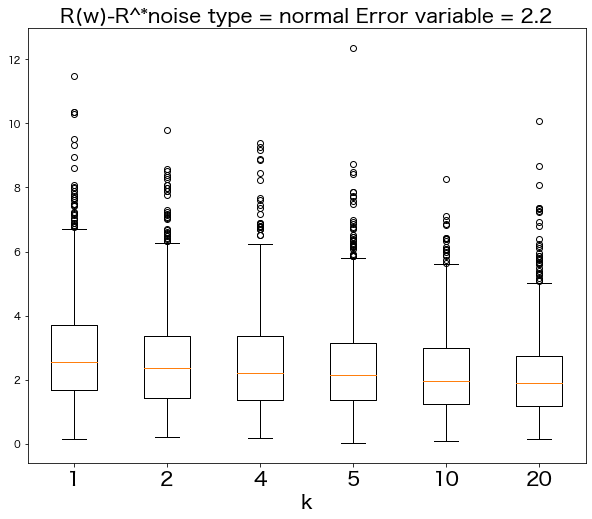

In [6]:
noise = "normal"
E_var = 2.2
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [7]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.853337,2.581622,2.543723,2.424420,2.230238,2.119075
std,1.675376,1.537306,1.529205,1.478055,1.306227,1.298969
min,0.132811,0.201832,0.177288,0.020645,0.079565,0.153906
25%,1.664637,1.420082,1.365147,1.368918,1.232538,1.191994
50%,2.558614,2.368414,2.204199,2.152041,1.962759,1.880347
75%,3.702333,3.369313,3.366237,3.148115,2.992412,2.744123
max,11.474306,9.804724,9.383981,12.362821,8.249994,10.063905


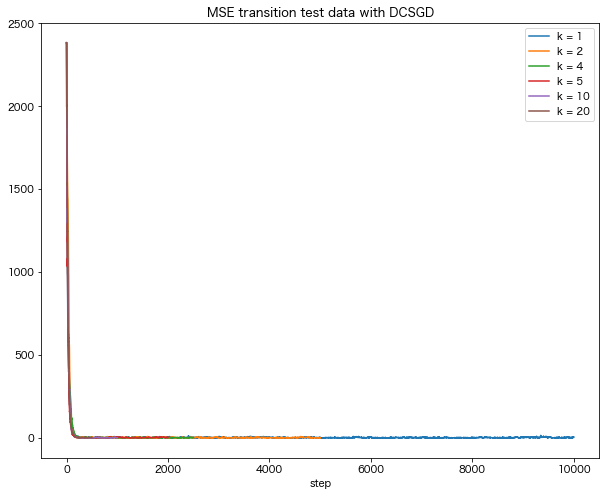

In [8]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/1000 [00:00<?, ?it/s]

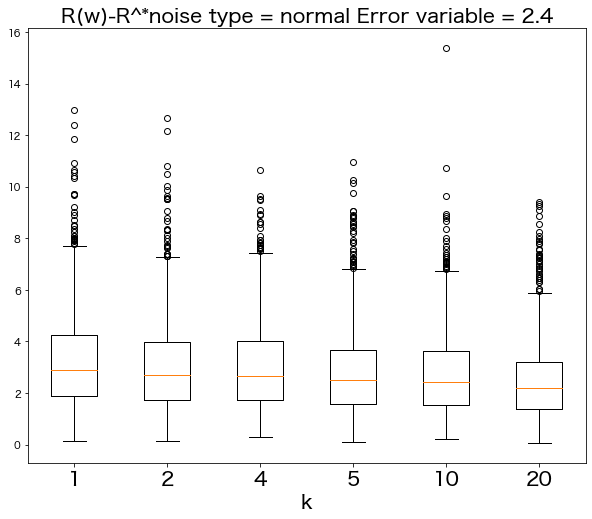

In [9]:
noise = "normal"
E_var = 2.4
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [10]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.252244,3.068305,3.036606,2.862847,2.737675,2.497854
std,1.928915,1.822270,1.748930,1.734078,1.684602,1.558167
min,0.124206,0.151291,0.285177,0.087512,0.202789,0.063760
25%,1.883226,1.740222,1.727690,1.594168,1.519810,1.376142
50%,2.876633,2.716043,2.665239,2.519632,2.413548,2.200121
75%,4.234242,3.969758,4.012526,3.685023,3.613911,3.205459
max,12.972370,12.680479,10.635709,10.967028,15.388525,9.393375


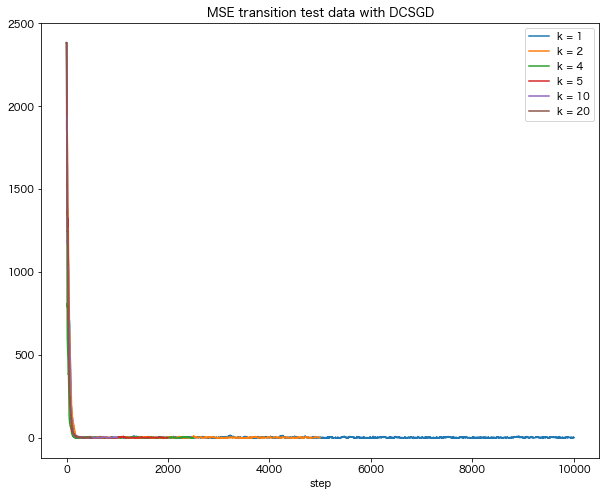

In [11]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/1000 [00:00<?, ?it/s]

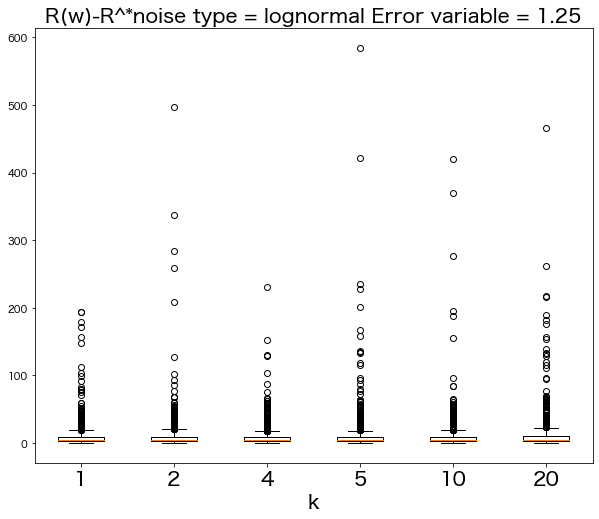

In [12]:
noise = "lognormal"
E_var = 1.25
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [13]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.336593,10.042546,8.496350,10.547435,9.561648,11.638308
std,17.139121,25.720038,14.471197,29.628711,23.750475,26.612667
min,0.149954,0.306375,0.063553,0.291054,0.049121,0.086439
25%,2.659858,2.520567,2.525157,2.439764,2.452296,2.793034
50%,4.911172,4.572714,4.420952,4.614625,4.727444,5.056228
75%,9.257869,9.660842,8.517986,8.900520,9.040238,10.902763
max,194.007902,497.578800,231.113790,584.531124,420.145357,465.981574


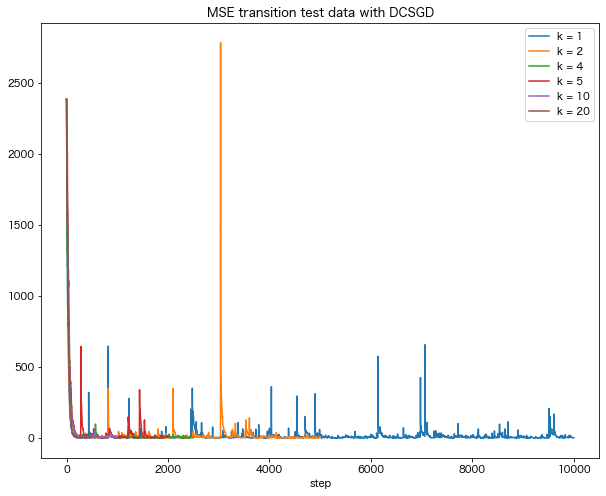

In [14]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/1000 [00:00<?, ?it/s]

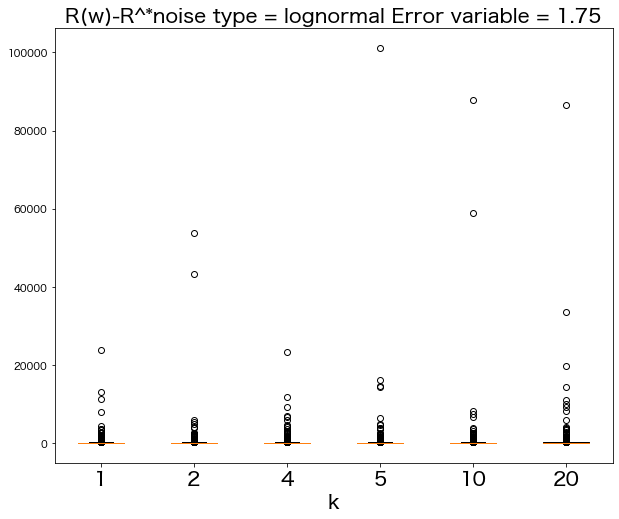

In [15]:
noise = "lognormal"
E_var = 1.75
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [16]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,191.729014,237.739558,202.039405,305.909465,310.105699,366.933247
std,1014.282228,2219.193034,1010.086114,3327.526581,3375.608287,3106.947669
min,2.209312,1.200403,2.189068,0.704407,1.097374,1.055900
25%,21.241115,20.277476,18.408651,20.652868,19.212959,23.241917
50%,47.756532,44.509404,41.895363,48.344649,48.644536,55.987871
75%,115.765781,104.676250,107.667244,116.379578,117.525769,149.735425
max,23712.102017,53829.243413,23420.391661,101224.163479,87831.611018,86431.277127


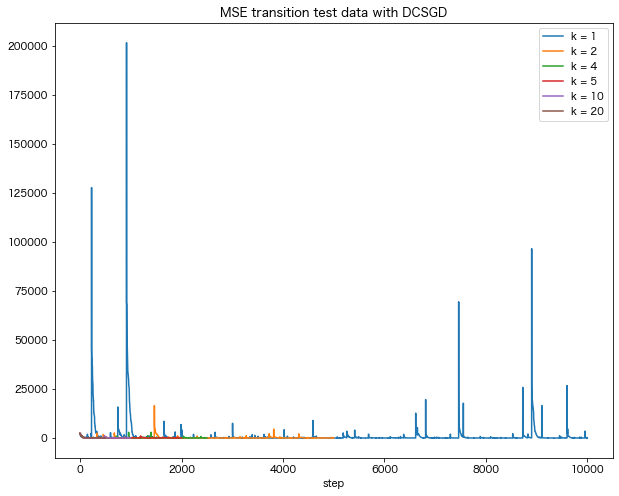

In [17]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)

  0%|          | 0/1000 [00:00<?, ?it/s]

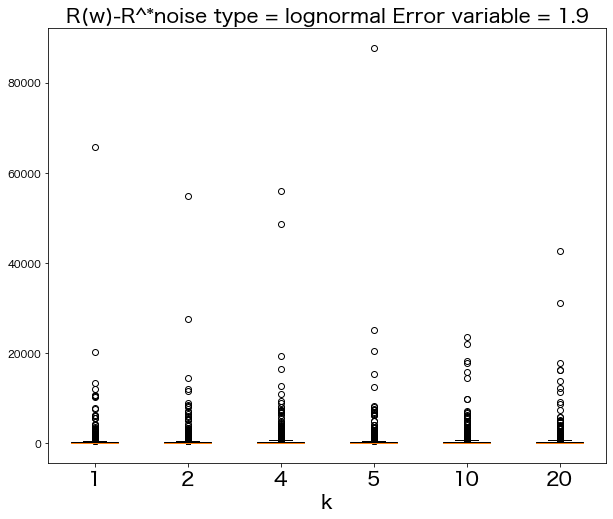

In [18]:
noise = "lognormal"
E_var = 1.90
title = f"noise type = {noise} Error variable = {E_var}"
DC = DC_SGD.DCSGDSimulation(w_star=w_star,n=n,E_var=E_var,X_mean=X_mean,X_var=X_var,noise=noise,loss_type=son,c=c,fixed_lr=True)
trial_num  = 1000
_, result_loss_gauss = DC.many_trails(trial_num=trial_num,max_k=20)
plot_set.box_plot_k(result=result_loss_gauss,k_string=columns,k_list=k_list,title=title)

In [19]:
df = pd.DataFrame(result_loss_gauss)
now = datetime.datetime.now()
df.to_csv(f"save_result_data/{now:%m月%d日%H:%M:%S}_noise_{noise}_trial_num_{trial_num}_E_var{E_var}.csv")

df = pd.DataFrame(result_loss_gauss[:,k_list],columns=columns)
df.describe()

,1,2,4,5,10,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,456.830351,444.175115,530.737286,481.689838,460.164948,522.882049
std,2435.924362,2222.650922,2687.722547,3127.376226,1678.996986,2153.132445
min,1.183230,2.393176,2.466181,1.854265,2.279971,1.630884
25%,39.629287,35.527878,39.693946,38.880165,41.425436,44.452559
50%,94.882094,77.851290,93.583606,89.823890,100.872337,113.385433
75%,242.972782,207.313864,260.439578,243.057618,274.108825,289.811146
max,65784.579617,54778.597991,56048.257845,87766.156715,23520.622397,42621.872146


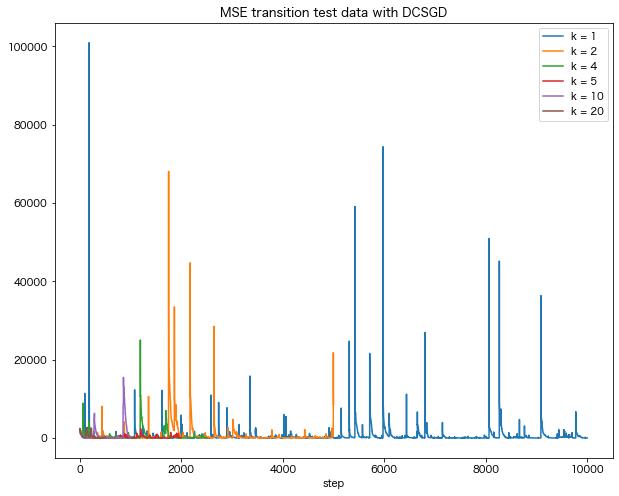

In [20]:
k_list_tr = [1,2,4,5,10,20]
transition_result = DC.multiple_k_transition(k_list=k_list_tr,w_init=w_init)
transition_title = "MSE transition test data with DCSGD"
plot_set.transition(title=transition_title,result=transition_result, k_list=columns)